In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def plot_difference_in_datasets(datasets, data_column, names = None, title = None, y_title = None,
                                pngtitles = (None, None)):
    datasets_df = [pd.read_csv(d) for d in datasets]
    
    if not names:
        names = ["".join(d.split("_")[-2:])[:-4] for d in datasets]

    df = pd.DataFrame()
    for d, n in zip(datasets_df, names):
        df[n] = np.abs(d[data_column])
    
    figsize = int(len(datasets_df)*1.4)
    fig = plt.figure(figsize=(figsize,6))
    df.boxplot()
    plt.title(title)
    plt.ylabel(y_title)
    if pngtitles[0]:
        plt.savefig(pngtitles[0])
    else:
        plt.show()
        

    fig = plt.figure(figsize=(figsize,6))
    sns.violinplot(data=df)
    plt.title(title)
    plt.ylabel(y_title)
    if pngtitles[1]:
        plt.savefig(pngtitles[1])
    else:
        plt.show()

C:\Users\annaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


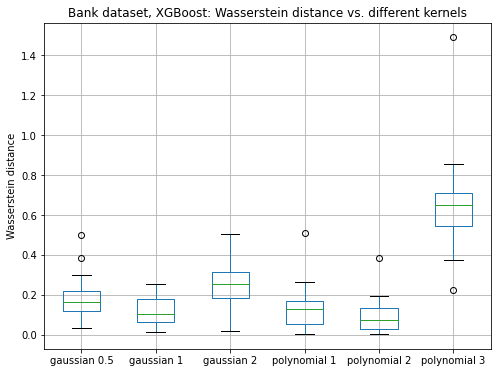

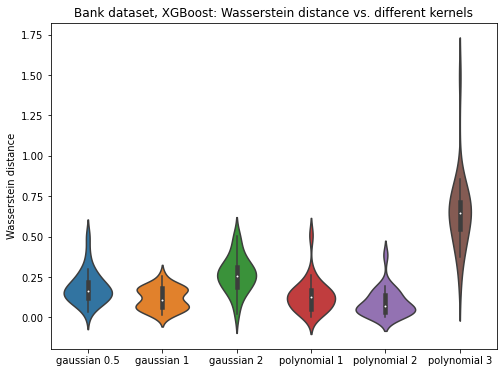

In [3]:
d1 = "./results/exp4_nocat_gaussian_0.5.csv"
d2 = "./results/exp4_nocat_gaussian_1.csv"
d3 = "./results/exp4_nocat_gaussian_2.csv"
d4 = "./results/exp4_nocat_polynomial_1.csv"
d5 = "./results/exp4_nocat_polynomial_2.csv"
d6 = "./results/exp4_nocat_polynomial_3.csv"

datasets = [d1, d2, d3, d4, d5, d6]
names = ["gaussian 0.5", "gaussian 1", "gaussian 2", "polynomial 1", "polynomial 2", "polynomial 3"]

plot_difference_in_datasets(datasets = datasets, data_column = 'wd_diff',
                            names = names, title = "Bank dataset, XGBoost: Wasserstein distance vs. different kernels",
                            y_title = "Wasserstein distance",
                            pngtitles = ('bank_wd_different_kernels_boxplot.png', None))

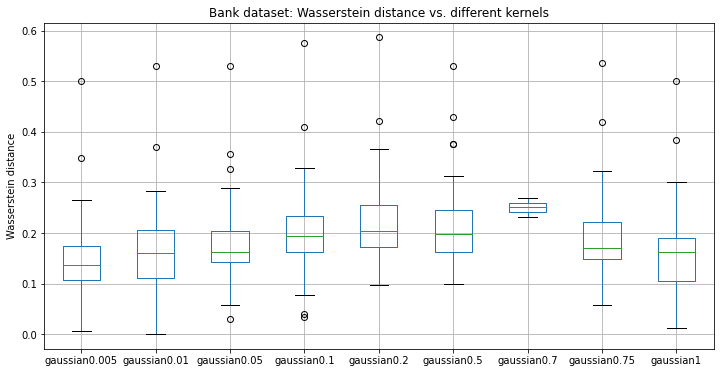

C:\Users\annaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


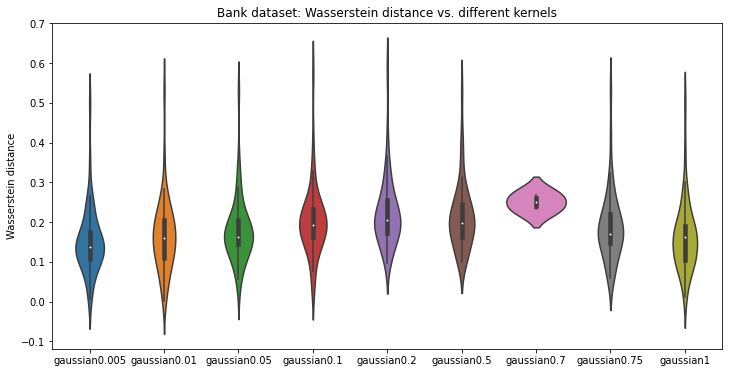

In [4]:
import os

bank_datasets = ["./results/"+f for f in os.listdir("./results")[:-1] if f.startswith("exp5_bank_gaussian")]
plot_difference_in_datasets(bank_datasets, data_column="wd_diff",
                            title="Bank dataset: Wasserstein distance vs. different kernels",
                            y_title = "Wasserstein distance",
                            pngtitles = (None, 'bank_wd_different_kernels_violinplot.png'))

In [5]:
'''#bank_datasets = ["./results/"+f for f in os.listdir("./results")[:-1] if f.startswith("exp5")]
#plot_difference_in_datasets(bank_datasets, data_column="wd_diff")

import re 

df = pd.read_csv("./results/exp4_nocat_gaussian_2.csv")

x = re.compile("^time.*diff$")

cols = [i for i in df.columns if x.match(i)][1:]

fig = plt.figure(figsize=(6,6))
df[cols].boxplot()
#plt.title(title)
plt.show();

fig = plt.figure(figsize=(6,6))
sns.violinplot(data=df[cols])
#plt.title(title)
plt.show();'''

'#bank_datasets = ["./results/"+f for f in os.listdir("./results")[:-1] if f.startswith("exp5")]\n#plot_difference_in_datasets(bank_datasets, data_column="wd_diff")\n\nimport re \n\ndf = pd.read_csv("./results/exp4_nocat_gaussian_2.csv")\n\nx = re.compile("^time.*diff$")\n\ncols = [i for i in df.columns if x.match(i)][1:]\n\nfig = plt.figure(figsize=(6,6))\ndf[cols].boxplot()\n#plt.title(title)\nplt.show();\n\nfig = plt.figure(figsize=(6,6))\nsns.violinplot(data=df[cols])\n#plt.title(title)\nplt.show();'

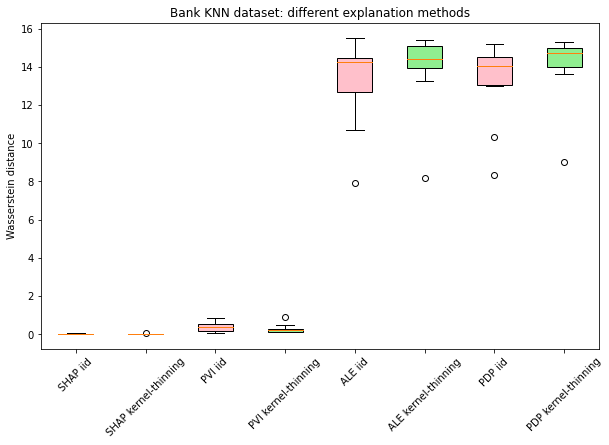

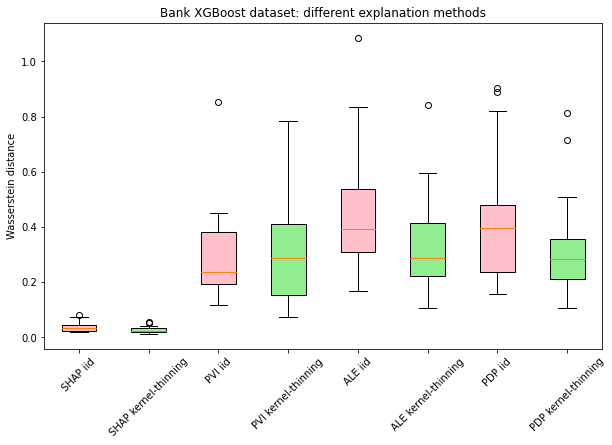

In [6]:
df_bank_knn = pd.read_parquet('./results/exp_bank_knn_nocat.parquet')
df_bank_xgb = pd.read_csv('./results/exp4_nocat_gaussian_1.csv')

'''knn'''
fig,ax = plt.subplots(figsize=(10,6))
labels = ['SHAP iid','SHAP kernel-thinning', 'PVI iid','PVI kernel-thinning',
          'ALE iid','ALE kernel-thinning', 'PDP iid', 'PDP kernel-thinning']
bp = ax.boxplot(df_bank_knn[['svi_random','svi_compressed', 'pvi_random','pvi_compressed',
             'ale_random','ale_compressed', 'pdp_random', 'pdp_compressed']], patch_artist=True)
for i, b in enumerate(bp['boxes']):
    if i%2==1:
        b.set_facecolor('lightgreen')
    else:
        b.set_facecolor('pink')
ax.set_title("Bank KNN dataset: different explanation methods")

ax.set_ylabel("Wasserstein distance")
ax.set_xticklabels(labels, rotation = 45)
#plt.show()

plt.savefig("bank_knn_different_explanation_methods.png")


'''xgb'''
fig,ax = plt.subplots(figsize=(10,6))
labels = ['SHAP iid','SHAP kernel-thinning', 'PVI iid','PVI kernel-thinning',
          'ALE iid','ALE kernel-thinning', 'PDP iid', 'PDP kernel-thinning']
bp = ax.boxplot(df_bank_xgb[['svi_random','svi_compressed', 'pvi_random','pvi_compressed',
             'ale_random','ale_compressed', 'pdp_random', 'pdp_compressed']], patch_artist = True)
for i, b in enumerate(bp['boxes']):
    if i%2==1:
        b.set_facecolor('lightgreen')
    else:
        b.set_facecolor('pink')
ax.set_title("Bank KNN dataset: different explanation methods")
plt.title("Bank XGBoost dataset: different explanation methods")
plt.ylabel("Wasserstein distance")
ax.set_xticklabels(labels, rotation = 45)
#plt.show()
plt.savefig("bank_xgb_different_explanation_methods.png")

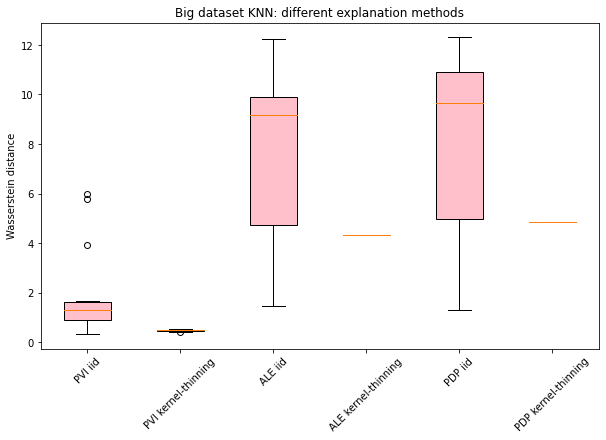

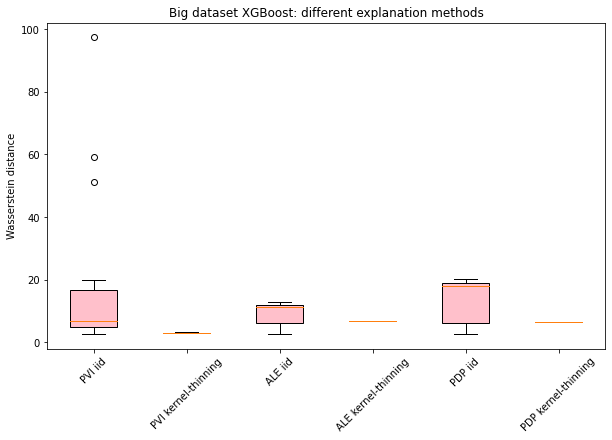

In [7]:
df_big_knn = pd.read_parquet('./results/exp_big_KNN2.parquet')
df_big_xgb = pd.read_parquet('./results/exp_big_XGBoost2.parquet')

'''knn'''
fig,ax = plt.subplots(figsize=(10,6))
labels = ['PVI iid','PVI kernel-thinning', 'ALE iid','ALE kernel-thinning', 'PDP iid', 'PDP kernel-thinning']
bp = ax.boxplot(df_big_knn[['pvi_random','pvi_compressed','ale_random','ale_compressed',
             'pdp_random', 'pdp_compressed']], patch_artist = True)
for i, b in enumerate(bp['boxes']):
    if i%2==1:
        b.set_facecolor('lightgreen')
    else:
        b.set_facecolor('pink')
ax.set_title("Bank KNN dataset: different explanation methods")
plt.title("Big dataset KNN: different explanation methods")
plt.ylabel("Wasserstein distance")
ax.set_xticklabels(labels, rotation = 45)
#plt.show()
plt.savefig("big_knn_different_explanation_methods.png")



'''xgb'''
df_big_knn = pd.read_parquet('./results/exp_big_KNN2.parquet')
df_big_xgb = pd.read_parquet('./results/exp_big_XGBoost2.parquet')

fig,ax = plt.subplots(figsize=(10,6))
labels = ['PVI iid','PVI kernel-thinning', 'ALE iid','ALE kernel-thinning', 'PDP iid', 'PDP kernel-thinning']
bp = ax.boxplot(df_big_xgb[['pvi_random','pvi_compressed','ale_random','ale_compressed',
             'pdp_random', 'pdp_compressed']], patch_artist = True)
for i, b in enumerate(bp['boxes']):
    if i%2==1:
        b.set_facecolor('lightgreen')
    else:
        b.set_facecolor('pink')
ax.set_title("Bank KNN dataset: different explanation methods")
plt.title("Big dataset XGBoost: different explanation methods")
plt.ylabel("Wasserstein distance")
ax.set_xticklabels(labels, rotation = 45)
#plt.show()
plt.savefig("big_xgb_different_explanation_methods.png")

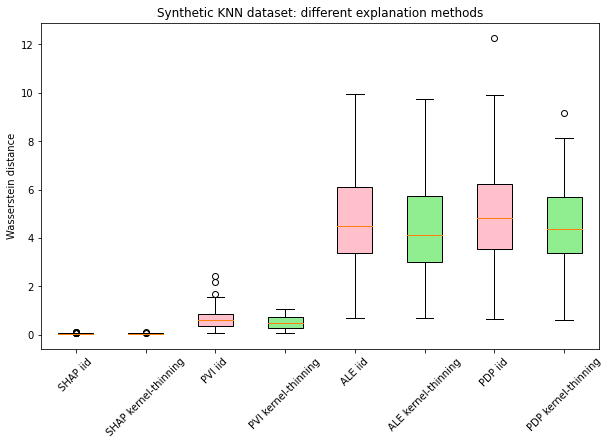

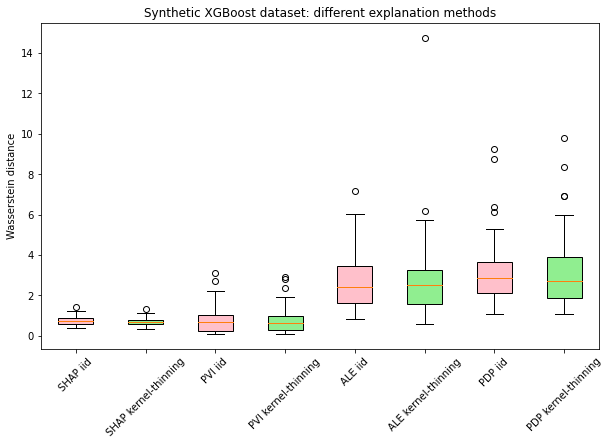

In [8]:
df_bank_knn = pd.read_parquet('./results/exp_synthetic_knn.parquet')
df_bank_xgb = pd.read_parquet('./results/synthetic_XGBoost2.parquet')

'''knn'''
fig,ax = plt.subplots(figsize=(10,6))
labels = ['SHAP iid','SHAP kernel-thinning', 'PVI iid','PVI kernel-thinning',
          'ALE iid','ALE kernel-thinning', 'PDP iid', 'PDP kernel-thinning']
bp = ax.boxplot(df_bank_knn[['svi_random','svi_compressed', 'pvi_random','pvi_compressed',
             'ale_random','ale_compressed', 'pdp_random', 'pdp_compressed']], patch_artist=True)
for i, b in enumerate(bp['boxes']):
    if i%2==1:
        b.set_facecolor('lightgreen')
    else:
        b.set_facecolor('pink')
ax.set_title("Synthetic KNN dataset: different explanation methods")

ax.set_ylabel("Wasserstein distance")
ax.set_xticklabels(labels, rotation = 45)
#plt.show()

plt.savefig("synthetic_knn_different_explanation_methods.png")


'''xgb'''
fig,ax = plt.subplots(figsize=(10,6))
labels = ['SHAP iid','SHAP kernel-thinning', 'PVI iid','PVI kernel-thinning',
          'ALE iid','ALE kernel-thinning', 'PDP iid', 'PDP kernel-thinning']
bp = ax.boxplot(df_bank_xgb[['svi_random','svi_compressed', 'pvi_random','pvi_compressed',
             'ale_random','ale_compressed', 'pdp_random', 'pdp_compressed']], patch_artist = True)
for i, b in enumerate(bp['boxes']):
    if i%2==1:
        b.set_facecolor('lightgreen')
    else:
        b.set_facecolor('pink')
plt.title("Synthetic XGBoost dataset: different explanation methods")
plt.ylabel("Wasserstein distance")
ax.set_xticklabels(labels, rotation = 45)
#plt.show()
plt.savefig("synthetic_xgb_different_explanation_methods.png")